# 深度學習_女裝配件辨識
Tensorflow官網提供程式碼與資料集   
[資料集](https://medium.com/tensorflow/hello-deep-learning-fashion-mnist-with-keras-50fcff8cd74a)  
[作法參考](https://ithelp.ithome.com.tw/articles/10233758)

資料集類別描述:  
0 T-shirt/top  
1 Trouser  
2 Pullover  
3 Dress  
4 Coat  
5 Sandal  
6 Shirt  
7 Sneaker  
8 Bag  
9 Ankle boot

## 一、載入資料並分割

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

mnist = tf.keras.datasets.mnist

#載入資料集mnist，並執行切割
ds = tf.keras.datasets.fashion_mnist.load_data()
(x_train, y_train),(x_test, y_test) = ds
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

X訓練資料 -> 6萬筆圖片(28*28pix)， y訓練資料 -> 6萬筆答案

X測試資料 -> 1萬筆圖片(28*28pix)， y測試資料 -> 1萬筆答案

訓練資料第2筆，標記為-T袖/上衣(0)-


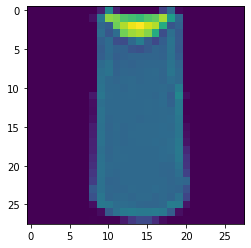

In [2]:
# Define the text labels
fashion_mnist_labels = ["T袖/上衣",   # index 0
                        "長褲",       # index 1
                        "套頭衫",     # index 2 
                        "洋裝",       # index 3 
                        "外套",       # index 4
                        "涼鞋",       # index 5
                        "襯衫",       # index 6 
                        "運動鞋",     # index 7 
                        "皮包",       # index 8 
                        "短靴"]       # index 9
img_index = 2
lab_index = y_train[img_index]
print(f'訓練資料第{img_index}筆，標記為-{fashion_mnist_labels[lab_index]}({lab_index})-')
plt.imshow(x_train[img_index])

In [3]:
# 顯示前10筆y_train
y_train[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

## 二、特徵工程

In [4]:
#特徵工程: (X-min)/(255-0)常態化
x_train_norm, x_test_norm = x_train / 255.0, x_test / 255.0

# 顯示第一筆資料
# x_train_norm[0]

## 三、訓練模型

In [5]:
#套入模型: Deep Learning
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),  #圖片28*28pix，input為這784
  tf.keras.layers.Dense(128, activation='relu'),  #Dense為連結層，128個神經元
  tf.keras.layers.Dropout(0.2),                   #訓練過程中隨機丟棄20%神經元
  tf.keras.layers.Dense(10, activation='softmax') #結果0~9，10個結果
])

In [6]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.1) #隨機梯度下降，註解3
model.compile(optimizer=optimizer, #'adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [7]:
#訓練
history = model.fit(x_train_norm, y_train, epochs=10, validation_split=0.2)

Epoch 1/10


   1/1500 [..............................] - ETA: 0s - loss: 2.2938 - accuracy: 0.0625

  78/1500 [>.............................] - ETA: 0s - loss: 1.1772 - accuracy: 0.5781

 167/1500 [==>...........................] - ETA: 0s - loss: 0.9707 - accuracy: 0.6463

 257/1500 [====>.........................] - ETA: 0s - loss: 0.8777 - accuracy: 0.6840

 341/1500 [=====>........................] - ETA: 0s - loss: 0.8163 - accuracy: 0.7059

 432/1500 [=======>......................] - ETA: 0s - loss: 0.7751 - accuracy: 0.7201



 521/1500 [=========>....................] - ETA: 0s - loss: 0.7423 - accuracy: 0.7322

 611/1500 [===========>..................] - ETA: 0s - loss: 0.7139 - accuracy: 0.7429

 697/1500 [============>.................] - ETA: 0s - loss: 0.6943 - accuracy: 0.7500

 786/1500 [==============>...............] - ETA: 0s - loss: 0.6713 - accuracy: 0.7580



 876/1500 [================>.............] - ETA: 0s - loss: 0.6538 - accuracy: 0.7647

 966/1500 [==================>...........] - ETA: 0s - loss: 0.6407 - accuracy: 0.7692

1056/1500 [====================>.........] - ETA: 0s - loss: 0.6309 - accuracy: 0.7722

1147/1500 [=====================>........] - ETA: 0s - loss: 0.6214 - accuracy: 0.7756



1238/1500 [=======================>......] - ETA: 0s - loss: 0.6111 - accuracy: 0.7799

1328/1500 [=========================>....] - ETA: 0s - loss: 0.6029 - accuracy: 0.7835

1418/1500 [===========================>..] - ETA: 0s - loss: 0.5946 - accuracy: 0.7865

1500/1500 [==============================] - 1s 759us/step - loss: 0.5892 - accuracy: 0.7881 - val_loss: 0.4413 - val_accuracy: 0.8419


Epoch 2/10
   1/1500 [..............................] - ETA: 0s - loss: 0.4405 - accuracy: 0.8125

  90/1500 [>.............................] - ETA: 0s - loss: 0.4802 - accuracy: 0.8250

 180/1500 [==>...........................] - ETA: 0s - loss: 0.4637 - accuracy: 0.8311

 270/1500 [====>.........................] - ETA: 0s - loss: 0.4610 - accuracy: 0.8321

 361/1500 [======>.......................] - ETA: 0s - loss: 0.4607 - accuracy: 0.8323

 451/1500 [========>.....................] - ETA: 0s - loss: 0.4596 - accuracy: 0.8337



 541/1500 [=========>....................] - ETA: 0s - loss: 0.4581 - accuracy: 0.8335

 631/1500 [===========>..................] - ETA: 0s - loss: 0.4560 - accuracy: 0.8340

 720/1500 [=============>................] - ETA: 0s - loss: 0.4555 - accuracy: 0.8336

 810/1500 [===============>..............] - ETA: 0s - loss: 0.4524 - accuracy: 0.8345



 901/1500 [=================>............] - ETA: 0s - loss: 0.4488 - accuracy: 0.8359

 991/1500 [==================>...........] - ETA: 0s - loss: 0.4446 - accuracy: 0.8378

1081/1500 [====================>.........] - ETA: 0s - loss: 0.4451 - accuracy: 0.8376

1169/1500 [======================>.......] - ETA: 0s - loss: 0.4450 - accuracy: 0.8379



1260/1500 [========================>.....] - ETA: 0s - loss: 0.4456 - accuracy: 0.8380

1349/1500 [=========================>....] - ETA: 0s - loss: 0.4447 - accuracy: 0.8386

1440/1500 [===========================>..] - ETA: 0s - loss: 0.4429 - accuracy: 0.8390

1500/1500 [==============================] - 1s 662us/step - loss: 0.4418 - accuracy: 0.8391 - val_loss: 0.3863 - val_accuracy: 0.8598


Epoch 3/10
   1/1500 [..............................] - ETA: 0s - loss: 0.3400 - accuracy: 0.8750

  90/1500 [>.............................] - ETA: 0s - loss: 0.4163 - accuracy: 0.8514

 180/1500 [==>...........................] - ETA: 0s - loss: 0.4011 - accuracy: 0.8516

 271/1500 [====>.........................] - ETA: 0s - loss: 0.4053 - accuracy: 0.8511

 361/1500 [======>.......................] - ETA: 0s - loss: 0.4073 - accuracy: 0.8491

 452/1500 [========>.....................] - ETA: 0s - loss: 0.4074 - accuracy: 0.8500

 542/1500 [=========>....................] - ETA: 0s - loss: 0.4112 - accuracy: 0.8487

 633/1500 [===========>..................] - ETA: 0s - loss: 0.4089 - accuracy: 0.8505

 723/1500 [=============>................] - ETA: 0s - loss: 0.4083 - accuracy: 0.8509

 813/1500 [===============>..............] - ETA: 0s - loss: 0.4082 - accuracy: 0.8508

 903/1500 [=================>............] - ETA: 0s - loss: 0.4079 - accuracy: 0.8513

 994/1500 [==================>...........] - ETA: 0s - loss: 0.4058 - accuracy: 0.8524

1084/1500 [====================>.........] - ETA: 0s - loss: 0.4039 - accuracy: 0.8528

1173/1500 [======================>.......] - ETA: 0s - loss: 0.4019 - accuracy: 0.8539

1263/1500 [========================>.....] - ETA: 0s - loss: 0.4024 - accuracy: 0.8536

1354/1500 [==========================>...] - ETA: 0s - loss: 0.4034 - accuracy: 0.8538

1444/1500 [===========================>..] - ETA: 0s - loss: 0.4040 - accuracy: 0.8534

1500/1500 [==============================] - 1s 660us/step - loss: 0.4042 - accuracy: 0.8534 - val_loss: 0.3709 - val_accuracy: 0.8671


Epoch 4/10
   1/1500 [..............................] - ETA: 0s - loss: 0.1776 - accuracy: 0.9688

  92/1500 [>.............................] - ETA: 0s - loss: 0.3556 - accuracy: 0.8668

 182/1500 [==>...........................] - ETA: 0s - loss: 0.3663 - accuracy: 0.8587

 274/1500 [====>.........................] - ETA: 0s - loss: 0.3765 - accuracy: 0.8581

 365/1500 [======>.......................] - ETA: 0s - loss: 0.3808 - accuracy: 0.8577

 454/1500 [========>.....................] - ETA: 0s - loss: 0.3833 - accuracy: 0.8570

 544/1500 [=========>....................] - ETA: 0s - loss: 0.3850 - accuracy: 0.8572

 635/1500 [===========>..................] - ETA: 0s - loss: 0.3826 - accuracy: 0.8586

 725/1500 [=============>................] - ETA: 0s - loss: 0.3837 - accuracy: 0.8590

 816/1500 [===============>..............] - ETA: 0s - loss: 0.3823 - accuracy: 0.8599

 906/1500 [=================>............] - ETA: 0s - loss: 0.3847 - accuracy: 0.8593

 997/1500 [==================>...........] - ETA: 0s - loss: 0.3828 - accuracy: 0.8606

1087/1500 [====================>.........] - ETA: 0s - loss: 0.3839 - accuracy: 0.8594

1177/1500 [======================>.......] - ETA: 0s - loss: 0.3832 - accuracy: 0.8593

1263/1500 [========================>.....] - ETA: 0s - loss: 0.3851 - accuracy: 0.8587

1353/1500 [==========================>...] - ETA: 0s - loss: 0.3832 - accuracy: 0.8593

1442/1500 [===========================>..] - ETA: 0s - loss: 0.3815 - accuracy: 0.8598



1500/1500 [==============================] - 1s 661us/step - loss: 0.3812 - accuracy: 0.8600 - val_loss: 0.3861 - val_accuracy: 0.8602


Epoch 5/10
   1/1500 [..............................] - ETA: 0s - loss: 0.4692 - accuracy: 0.8438

  91/1500 [>.............................] - ETA: 0s - loss: 0.3585 - accuracy: 0.8671

 182/1500 [==>...........................] - ETA: 0s - loss: 0.3692 - accuracy: 0.8674

 272/1500 [====>.........................] - ETA: 0s - loss: 0.3616 - accuracy: 0.8698

 363/1500 [======>.......................] - ETA: 0s - loss: 0.3609 - accuracy: 0.8692

 453/1500 [========>.....................] - ETA: 0s - loss: 0.3609 - accuracy: 0.8682

 544/1500 [=========>....................] - ETA: 0s - loss: 0.3613 - accuracy: 0.8678



 634/1500 [===========>..................] - ETA: 0s - loss: 0.3638 - accuracy: 0.8662

 724/1500 [=============>................] - ETA: 0s - loss: 0.3635 - accuracy: 0.8664

 814/1500 [===============>..............] - ETA: 0s - loss: 0.3638 - accuracy: 0.8667

 904/1500 [=================>............] - ETA: 0s - loss: 0.3621 - accuracy: 0.8668



 995/1500 [==================>...........] - ETA: 0s - loss: 0.3632 - accuracy: 0.8660

1085/1500 [====================>.........] - ETA: 0s - loss: 0.3632 - accuracy: 0.8664

1174/1500 [======================>.......] - ETA: 0s - loss: 0.3632 - accuracy: 0.8662

1264/1500 [========================>.....] - ETA: 0s - loss: 0.3634 - accuracy: 0.8665



1354/1500 [==========================>...] - ETA: 0s - loss: 0.3648 - accuracy: 0.8664

1444/1500 [===========================>..] - ETA: 0s - loss: 0.3642 - accuracy: 0.8666

1500/1500 [==============================] - 1s 660us/step - loss: 0.3642 - accuracy: 0.8665 - val_loss: 0.3605 - val_accuracy: 0.8658


Epoch 6/10
   1/1500 [..............................] - ETA: 1s - loss: 0.5111 - accuracy: 0.7812

  91/1500 [>.............................] - ETA: 0s - loss: 0.3396 - accuracy: 0.8777

 177/1500 [==>...........................] - ETA: 0s - loss: 0.3501 - accuracy: 0.8746

 263/1500 [====>.........................] - ETA: 0s - loss: 0.3512 - accuracy: 0.8725

 351/1500 [======>.......................] - ETA: 0s - loss: 0.3483 - accuracy: 0.8752



 441/1500 [=======>......................] - ETA: 0s - loss: 0.3509 - accuracy: 0.8734

 520/1500 [=========>....................] - ETA: 0s - loss: 0.3510 - accuracy: 0.8739

 607/1500 [===========>..................] - ETA: 0s - loss: 0.3502 - accuracy: 0.8739

 697/1500 [============>.................] - ETA: 0s - loss: 0.3532 - accuracy: 0.8718



 788/1500 [==============>...............] - ETA: 0s - loss: 0.3567 - accuracy: 0.8705

 877/1500 [================>.............] - ETA: 0s - loss: 0.3554 - accuracy: 0.8702

 968/1500 [==================>...........] - ETA: 0s - loss: 0.3543 - accuracy: 0.8704

1058/1500 [====================>.........] - ETA: 0s - loss: 0.3546 - accuracy: 0.8703



1146/1500 [=====================>........] - ETA: 0s - loss: 0.3534 - accuracy: 0.8703

1236/1500 [=======================>......] - ETA: 0s - loss: 0.3538 - accuracy: 0.8701

1326/1500 [=========================>....] - ETA: 0s - loss: 0.3521 - accuracy: 0.8705

1415/1500 [===========================>..] - ETA: 0s - loss: 0.3516 - accuracy: 0.8706

1500/1500 [==============================] - 1s 674us/step - loss: 0.3517 - accuracy: 0.8703 - val_loss: 0.3413 - val_accuracy: 0.8775


Epoch 7/10
   1/1500 [..............................] - ETA: 0s - loss: 0.2536 - accuracy: 0.9375

  91/1500 [>.............................] - ETA: 0s - loss: 0.3531 - accuracy: 0.8688

 181/1500 [==>...........................] - ETA: 0s - loss: 0.3414 - accuracy: 0.8734

 271/1500 [====>.........................] - ETA: 0s - loss: 0.3445 - accuracy: 0.8710

 361/1500 [======>.......................] - ETA: 0s - loss: 0.3357 - accuracy: 0.8745

 450/1500 [========>.....................] - ETA: 0s - loss: 0.3313 - accuracy: 0.8771



 540/1500 [=========>....................] - ETA: 0s - loss: 0.3311 - accuracy: 0.8773

 630/1500 [===========>..................] - ETA: 0s - loss: 0.3323 - accuracy: 0.8760

 721/1500 [=============>................] - ETA: 0s - loss: 0.3326 - accuracy: 0.8763

 811/1500 [===============>..............] - ETA: 0s - loss: 0.3331 - accuracy: 0.8767



 901/1500 [=================>............] - ETA: 0s - loss: 0.3339 - accuracy: 0.8767

 987/1500 [==================>...........] - ETA: 0s - loss: 0.3320 - accuracy: 0.8776

1068/1500 [====================>.........] - ETA: 0s - loss: 0.3322 - accuracy: 0.8776

1148/1500 [=====================>........] - ETA: 0s - loss: 0.3353 - accuracy: 0.8761



1227/1500 [=======================>......] - ETA: 0s - loss: 0.3347 - accuracy: 0.8762

1303/1500 [=========================>....] - ETA: 0s - loss: 0.3341 - accuracy: 0.8759

1378/1500 [==========================>...] - ETA: 0s - loss: 0.3347 - accuracy: 0.8760

1451/1500 [============================>.] - ETA: 0s - loss: 0.3347 - accuracy: 0.8764

1500/1500 [==============================] - 1s 721us/step - loss: 0.3357 - accuracy: 0.8761 - val_loss: 0.3430 - val_accuracy: 0.8770


Epoch 8/10
   1/1500 [..............................] - ETA: 0s - loss: 0.2992 - accuracy: 0.9062

  72/1500 [>.............................] - ETA: 1s - loss: 0.3409 - accuracy: 0.8806

 142/1500 [=>............................] - ETA: 0s - loss: 0.3299 - accuracy: 0.8823

 212/1500 [===>..........................] - ETA: 0s - loss: 0.3295 - accuracy: 0.8800

 283/1500 [====>.........................] - ETA: 0s - loss: 0.3280 - accuracy: 0.8815

 350/1500 [======>.......................] - ETA: 0s - loss: 0.3274 - accuracy: 0.8809

 418/1500 [=======>......................] - ETA: 0s - loss: 0.3276 - accuracy: 0.8803

 485/1500 [========>.....................] - ETA: 0s - loss: 0.3251 - accuracy: 0.8811

 552/1500 [==========>...................] - ETA: 0s - loss: 0.3239 - accuracy: 0.8813

 620/1500 [===========>..................] - ETA: 0s - loss: 0.3232 - accuracy: 0.8809

 687/1500 [============>.................] - ETA: 0s - loss: 0.3212 - accuracy: 0.8816

 755/1500 [==============>...............] - ETA: 0s - loss: 0.3222 - accuracy: 0.8812

 822/1500 [===============>..............] - ETA: 0s - loss: 0.3226 - accuracy: 0.8815

 888/1500 [================>.............] - ETA: 0s - loss: 0.3262 - accuracy: 0.8798

 953/1500 [==================>...........] - ETA: 0s - loss: 0.3258 - accuracy: 0.8795

1018/1500 [===================>..........] - ETA: 0s - loss: 0.3269 - accuracy: 0.8791



1084/1500 [====================>.........] - ETA: 0s - loss: 0.3278 - accuracy: 0.8789

1149/1500 [=====================>........] - ETA: 0s - loss: 0.3277 - accuracy: 0.8786

1215/1500 [=======================>......] - ETA: 0s - loss: 0.3269 - accuracy: 0.8787

1280/1500 [========================>.....] - ETA: 0s - loss: 0.3268 - accuracy: 0.8790



1346/1500 [=========================>....] - ETA: 0s - loss: 0.3283 - accuracy: 0.8786

1410/1500 [===========================>..] - ETA: 0s - loss: 0.3284 - accuracy: 0.8787

1475/1500 [============================>.] - ETA: 0s - loss: 0.3272 - accuracy: 0.8789

1500/1500 [==============================] - 1s 890us/step - loss: 0.3271 - accuracy: 0.8790 - val_loss: 0.3424 - val_accuracy: 0.8764


Epoch 9/10
   1/1500 [..............................] - ETA: 0s - loss: 0.4511 - accuracy: 0.8750

  69/1500 [>.............................] - ETA: 1s - loss: 0.3290 - accuracy: 0.8895

 136/1500 [=>............................] - ETA: 1s - loss: 0.3242 - accuracy: 0.8863

 204/1500 [===>..........................] - ETA: 0s - loss: 0.3213 - accuracy: 0.8851

 271/1500 [====>.........................] - ETA: 0s - loss: 0.3280 - accuracy: 0.8828

 338/1500 [=====>........................] - ETA: 0s - loss: 0.3271 - accuracy: 0.8817

 405/1500 [=======>......................] - ETA: 0s - loss: 0.3245 - accuracy: 0.8818

 472/1500 [========>.....................] - ETA: 0s - loss: 0.3231 - accuracy: 0.8824

 539/1500 [=========>....................] - ETA: 0s - loss: 0.3195 - accuracy: 0.8834

 607/1500 [===========>..................] - ETA: 0s - loss: 0.3221 - accuracy: 0.8822



 674/1500 [============>.................] - ETA: 0s - loss: 0.3221 - accuracy: 0.8819

 742/1500 [=============>................] - ETA: 0s - loss: 0.3221 - accuracy: 0.8826

 809/1500 [===============>..............] - ETA: 0s - loss: 0.3226 - accuracy: 0.8819

 876/1500 [================>.............] - ETA: 0s - loss: 0.3215 - accuracy: 0.8823



 944/1500 [=================>............] - ETA: 0s - loss: 0.3229 - accuracy: 0.8813

1012/1500 [===================>..........] - ETA: 0s - loss: 0.3238 - accuracy: 0.8804

1080/1500 [====================>.........] - ETA: 0s - loss: 0.3240 - accuracy: 0.8802

1148/1500 [=====================>........] - ETA: 0s - loss: 0.3234 - accuracy: 0.8803

1215/1500 [=======================>......] - ETA: 0s - loss: 0.3233 - accuracy: 0.8803

1283/1500 [========================>.....] - ETA: 0s - loss: 0.3223 - accuracy: 0.8810

1351/1500 [==========================>...] - ETA: 0s - loss: 0.3216 - accuracy: 0.8809

1418/1500 [===========================>..] - ETA: 0s - loss: 0.3207 - accuracy: 0.8814

1487/1500 [============================>.] - ETA: 0s - loss: 0.3196 - accuracy: 0.8819



1500/1500 [==============================] - 1s 883us/step - loss: 0.3196 - accuracy: 0.8819 - val_loss: 0.3394 - val_accuracy: 0.8714


Epoch 10/10
   1/1500 [..............................] - ETA: 0s - loss: 0.6310 - accuracy: 0.7500

  69/1500 [>.............................] - ETA: 1s - loss: 0.3094 - accuracy: 0.8918

 135/1500 [=>............................] - ETA: 1s - loss: 0.3034 - accuracy: 0.8907

 203/1500 [===>..........................] - ETA: 0s - loss: 0.3039 - accuracy: 0.8884

 271/1500 [====>.........................] - ETA: 0s - loss: 0.3043 - accuracy: 0.8892

 341/1500 [=====>........................] - ETA: 0s - loss: 0.3068 - accuracy: 0.8867



 411/1500 [=======>......................] - ETA: 0s - loss: 0.3028 - accuracy: 0.8888

 481/1500 [========>.....................] - ETA: 0s - loss: 0.3046 - accuracy: 0.8881

 552/1500 [==========>...................] - ETA: 0s - loss: 0.3060 - accuracy: 0.8876

 622/1500 [===========>..................] - ETA: 0s - loss: 0.3063 - accuracy: 0.8875



 692/1500 [============>.................] - ETA: 0s - loss: 0.3077 - accuracy: 0.8868

 748/1500 [=============>................] - ETA: 0s - loss: 0.3079 - accuracy: 0.8868

 818/1500 [===============>..............] - ETA: 0s - loss: 0.3104 - accuracy: 0.8857

 889/1500 [================>.............] - ETA: 0s - loss: 0.3109 - accuracy: 0.8856

 958/1500 [==================>...........] - ETA: 0s - loss: 0.3107 - accuracy: 0.8856

1027/1500 [===================>..........] - ETA: 0s - loss: 0.3110 - accuracy: 0.8855

1097/1500 [====================>.........] - ETA: 0s - loss: 0.3103 - accuracy: 0.8860

1166/1500 [======================>.......] - ETA: 0s - loss: 0.3096 - accuracy: 0.8868



1235/1500 [=======================>......] - ETA: 0s - loss: 0.3083 - accuracy: 0.8870

1302/1500 [=========================>....] - ETA: 0s - loss: 0.3079 - accuracy: 0.8875

1370/1500 [==========================>...] - ETA: 0s - loss: 0.3083 - accuracy: 0.8872

1437/1500 [===========================>..] - ETA: 0s - loss: 0.3080 - accuracy: 0.8878

1500/1500 [==============================] - 1s 870us/step - loss: 0.3087 - accuracy: 0.8873 - val_loss: 0.3408 - val_accuracy: 0.8769


## 四、評估

In [8]:
# 評估，打分數
score=model.evaluate(x_test_norm, y_test, verbose=0)
score

[0.36621198058128357, 0.8702999949455261]

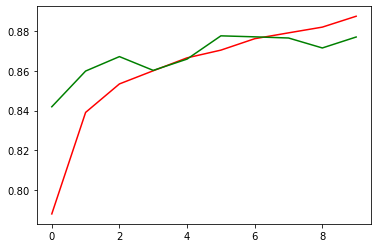

In [9]:
# 對訓練過程的準確度繪圖
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], 'r')
plt.plot(history.history['val_accuracy'], 'g')

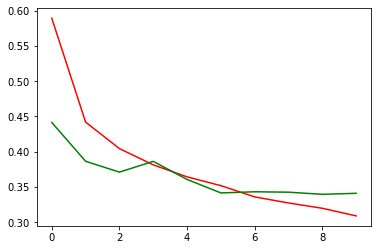

In [10]:
# 對訓練過程的損失函數繪圖
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], 'r')
plt.plot(history.history['val_loss'], 'g')

In [11]:
predictions = model.predict_classes(x_test_norm)
# get prediction result
print('prediction:', predictions[0:20])
print('actual    :', y_test[0:20])

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


prediction:

 [9 2 1 1 6 1 4 6 5 7 4 5 5 3 4 1 2 4 8 0]
actual    : [9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 4 8 0]


In [12]:
# 顯示模型的彙總資訊
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


## 實物測試 
利用Windows圖形介面，透過拖曳，取得圖片檔，顯示並使用已訓練好模型進行預測，並顯示  

為了可以拖曳圖片後，顯示影像需安裝以下2個套件  

pip install windnd

pip install pillow

皮包
[8]


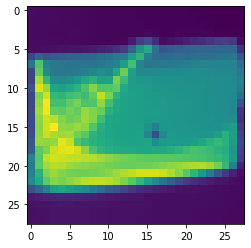

In [13]:
# 在CMD下安裝 pip install windnd與pip install pillow
import tkinter as tk
from tkinter.messagebox import showinfo
import windnd
from PIL import Image, ImageTk
from skimage import io
from skimage.transform import resize
import numpy as np

def dragged_files(files):
    #取得檔案路徑(只能取英文路徑)
    msg = '\n'.join((item.decode('gbk') for item in files))
    
    #顯示圖片
    im = Image.open(msg) #只能辨識英文路徑
    img = ImageTk.PhotoImage(im)
    img_lab.config(image=img)
    img_lab.image = img
    img_lab.pack()
    
    #進行預測
    image1 = io.imread(msg, as_gray=True)
    image_resized = resize(image1, (28, 28), anti_aliasing=True)    
    X1 = image_resized.reshape(1, 28, 28) #/ 255
    X1 = np.abs(1-X1)
    predictions = model.predict_classes(X1)
    
    #顯示影像與圖片
    print(fashion_mnist_labels[int(predictions)])   
    print(predictions)
    plt.imshow(X1.reshape(28,28))
    plt.show() 
    
    #顯示預測值
    strVar.set(f'該圖片為- {fashion_mnist_labels[int(predictions)]} -')
    
window = tk.Tk()
window.geometry('300x320')
window.title('圖片辨識')

#顯示答案
strVar = tk.StringVar()  #建立可更改Label之變數
strVar.set("  ")
resultLab = tk.Label(window,
                     textvariable = strVar,
                     font = ('Arial', 12),
                     width = 30, height = 2)
resultLab.pack()

#圖檔frame
textImg = tk.StringVar()
textImg.set('請拖曳圖片到此，進行辨識')
img_lab = tk.Label(window,
                    textvariable = textImg,
                    font = ('Arial', 12),
                    width = 300, height = 300)
img_lab.pack()

windnd.hook_dropfiles(window, func=dragged_files)
window.mainloop()

**執行結果**
<img src="https://github.com/Yi-Huei/bin/blob/master/images/DL_Clothes.png?raw=true" style="zoom:60%" />

**結論:準確度為86.61%，並不高，且測試後出錯也不少**

## 完整程式碼

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt

mnist = tf.keras.datasets.mnist

ds = tf.keras.datasets.fashion_mnist.load_data()
(x_train, y_train),(x_test, y_test) = ds

# labels
fashion_mnist_labels = ["T袖/上衣",   # index 0
                        "長褲",       # index 1
                        "套頭衫",     # index 2 
                        "洋裝",       # index 3 
                        "外套",       # index 4
                        "涼鞋",       # index 5
                        "襯衫",       # index 6 
                        "運動鞋",     # index 7 
                        "皮包",       # index 8 
                        "短靴"]       # index 9

x_train_norm, x_test_norm = x_train / 255.0, x_test / 255.0

#模型: Deep Learning
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),  #圖片28*28pix，input為這784
  tf.keras.layers.Dense(128, activation='relu'),  #Dense為連結層，128個神經元
  tf.keras.layers.Dropout(0.2),                   #訓練過程中隨機丟棄20%神經元
  tf.keras.layers.Dense(10, activation='softmax') #結果0~9，10個結果
])
optimizer = tf.keras.optimizers.SGD(learning_rate=0.1) 
model.compile(optimizer=optimizer, #'adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(x_train_norm, y_train, epochs=10, validation_split=0.2)
score=model.evaluate(x_test_norm, y_test, verbose=0)
print(score)

predictions = model.predict_classes(x_test_norm)
print('prediction:', predictions[0:20])
print('actual    :', y_test[0:20])